<font color = "blue">
    
# Hola como estan todos.

 Hoy vamos a trabajar con un algoritmo básico de machine learning para identificar si sobrevive o no un pasajero del titanic.</font>

In [7]:
#!dir  # es para windows
#!open . # Mac

In [2]:
import os 
import pandas as pd
import numpy as np



In [4]:
dataset_path =os.path.join('datasets', 'titanic3.csv')
titanic = pd.red_csv(dataset_path)
print(titanic.columns)

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')


In [6]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


Here is a broad description of the keys and what they mean:

```
pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
survival        Survival
                (0 = No; 1 = Yes)
name            Name
sex             Sex
age             Age
sibsp           Number of Siblings/Spouses Aboard
parch           Number of Parents/Children Aboard
ticket          Ticket Number
fare            Passenger Fare
cabin           Cabin
embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)
boat            Lifeboat
body            Body Identification Number
home.dest       Home/Destination
```

In general, it looks like `name`, `sex`, `cabin`, `embarked`, `boat`, `body`, and `homedest` may be candidates for categorical features, while the rest appear to be numerical features. We can also look at the first couple of rows in the dataset to get a better understanding:

In [11]:
type(titanic)

pandas.core.frame.DataFrame

In [8]:
titanic.shape

(1309, 14)

In [9]:
titanic.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [13]:
labels = titanic.survived.values #titanic["survived"].values
labels

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [14]:
features = titanic[['pclass', 'sex', 
                    'age', 'sibsp', 'parch', 'fare', 'embarked']]

In [15]:
features.head()

,pclass,sex,age,sibsp,parch,fare,embarked
0,1,female,29.0000,0,0,211.3375,S
1,1,male,0.9167,1,2,151.5500,S
2,1,female,2.0000,1,2,151.5500,S
3,1,male,30.0000,1,2,151.5500,S
4,1,female,25.0000,1,2,151.5500,S


$$\sum( w_1x_1 +w_2x_2 + w_3x_3 + b ) $$

In [19]:
pd.get_dummies(features)

,pclass,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,1,29.0000,0,0,211.3375,1,0,0,0,1
1,1,0.9167,1,2,151.5500,0,1,0,0,1
2,1,2.0000,1,2,151.5500,1,0,0,0,1
3,1,30.0000,1,2,151.5500,0,1,0,0,1
4,1,25.0000,1,2,151.5500,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
1304,3,14.5000,1,0,14.4542,1,0,1,0,0
1305,3,NaN,1,0,14.4542,1,0,1,0,0
1306,3,26.5000,0,0,7.2250,0,1,1,0,0
1307,3,27.0000,0,0,7.2250,0,1,1,0,0


In [20]:
features_dummies = pd.get_dummies(features, )
features_dummies.head()

,age,sibsp,parch,fare,pclass_1,pclass_2,pclass_3,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,29.0000,0,0,211.3375,1,0,0,1,0,0,0,1
1,0.9167,1,2,151.5500,1,0,0,0,1,0,0,1
2,2.0000,1,2,151.5500,1,0,0,1,0,0,0,1
3,30.0000,1,2,151.5500,1,0,0,0,1,0,0,1
4,25.0000,1,2,151.5500,1,0,0,1,0,0,0,1


In [21]:
features_dummies.shape

(1309, 12)

In [30]:
features_dummies.isna()

,age,sibsp,parch,fare,pclass_1,pclass_2,pclass_3,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,False,False,False,False,False,False,False,False,False,False,False,False
1305,True,False,False,False,False,False,False,False,False,False,False,False
1306,False,False,False,False,False,False,False,False,False,False,False,False
1307,False,False,False,False,False,False,False,False,False,False,False,False


In [25]:
features_dummies.isna().any()

age            True
sibsp         False
parch         False
fare           True
pclass_1      False
pclass_2      False
pclass_3      False
sex_female    False
sex_male      False
embarked_C    False
embarked_Q    False
embarked_S    False
dtype: bool

In [26]:
features_dummies_train = features_dummies.dropna()

features_dummies_train.isna().any()

age           False
sibsp         False
parch         False
fare          False
pclass_1      False
pclass_2      False
pclass_3      False
sex_female    False
sex_male      False
embarked_C    False
embarked_Q    False
embarked_S    False
dtype: bool

In [27]:
features_dummies_train.shape

(1045, 12)

In [29]:
labels_train = labels[features_dummies_train.index]
labels_train

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [32]:
#features_dummies_train.to_csv("features_dummies_train_Titanic.csv")

In [41]:
features_dummies_train.head()

,age,sibsp,parch,fare,pclass_1,pclass_2,pclass_3,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,29.0000,0,0,211.3375,1,0,0,1,0,0,0,1
1,0.9167,1,2,151.5500,1,0,0,0,1,0,0,1
2,2.0000,1,2,151.5500,1,0,0,1,0,0,0,1
3,30.0000,1,2,151.5500,1,0,0,0,1,0,0,1
4,25.0000,1,2,151.5500,1,0,0,1,0,0,0,1


# LogisticRegression

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
LogisticRegression?

In [38]:
model = LogisticRegression(solver='lbfgs',max_iter=500)

In [39]:
model.fit(features_dummies_train,labels_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
 labels_train #Real

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [40]:
model.predict(features_dummies_train) # Predict

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [43]:
sum(model.predict(features_dummies_train) ==  labels_train)

828

In [45]:
sum(model.predict(features_dummies_train) ==  labels_train) / (len(labels_train))

0.7923444976076555

P(A)/P(N) 

In [47]:
len(labels_train)

1045

In [48]:
828/1045 

0.7923444976076555

In [50]:
print("logistic regression score: %f" % model.score(features_dummies_train, labels_train))

logistic regression score: 0.792344


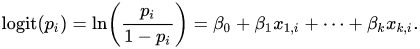

## Split into Train and Test Sets

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
train_data, test_data, train_labels, test_labels = train_test_split(features_dummies_train, labels_train,
                                                                    random_state=0,test_size=0.33)

In [54]:
train_data.shape,test_data.shape

((700, 12), (345, 12))

In [56]:
train_labels.shape,test_labels.shape

((700,), (345,))

Case 2:

```python
n = 1000
train_features = features.iloc[:n]
test_features = features.iloc[n:]

train_labels = labels[:n]
test_labels = labels[n:]
```

In [57]:
model = LogisticRegression(solver='lbfgs',max_iter=500).fit(train_data,train_labels)

print("Logistic regression score: %f" % model.score(test_data,test_labels))

Logistic regression score: 0.788406


In [59]:
#labels = titanic.survived.values
features = titanic[['pclass', 'sex', 
                    'age', 'sibsp', 'parch', 'fare', 'embarked']]

features = pd.get_dummies(features, columns=['pclass', 'sex', 'embarked'])

features = features.dropna()
labels = labels[features.index]

train_data, test_data, train_labels, test_labels = train_test_split(features, labels_train,
                                                                    random_state=0,test_size=0.33)

model = LogisticRegression(solver="lbfgs",max_iter=500).fit(train_data, train_labels)
print("logistic regression score: %f" % model.score(test_data, test_labels))

logistic regression score: 0.788406


In [62]:
#model.predict(test_data) == test_labels

In [64]:
test_data.head()

,age,sibsp,parch,fare,pclass_1,pclass_2,pclass_3,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
281,43.0,1,0,55.4417,1,0,0,1,0,1,0,0
1267,30.0,1,1,24.1500,0,0,1,1,0,0,0,1
849,26.0,1,0,7.8542,0,0,1,0,1,0,0,1
1066,28.5,0,0,7.2292,0,0,1,0,1,1,0,0
109,36.0,0,0,26.3875,1,0,0,0,1,0,0,1


In [68]:
test_data.iloc[:3]

,age,sibsp,parch,fare,pclass_1,pclass_2,pclass_3,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
281,43.0,1,0,55.4417,1,0,0,1,0,1,0,0
1267,30.0,1,1,24.1500,0,0,1,1,0,0,0,1
849,26.0,1,0,7.8542,0,0,1,0,1,0,0,1


In [69]:
model.predict(test_data.iloc[:3])

array([1, 1, 0], dtype=int64)

# Tarea 1

In [71]:
[1, 'female', 29.0, 0, 0, 211.3375, 'S']
[3,'female',30,0,0,100,'Q']
[2,'female',30,0,0,100,'Q']
[1,'male',30,0,0,100,'C']


[1, 'male', 30, 0, 0, 100, 'C']